In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def callBS(underlyingPrice, strikePrice, timetoMaturity, sigma, r, q=0):
    d1 = np.log(underlyingPrice/strikePrice) + (r-q+0.5*sigma**2)*timetoMaturity
    d1 /= sigma*np.sqrt(timetoMaturity)
    d2 = d1 - sigma*np.sqrt(timetoMaturity)
    N1 = norm.cdf(d1)
    N2 = norm.cdf(d2)
    return np.exp(-q*timetoMaturity)*underlyingPrice*N1 - np.exp(-r*timetoMaturity)*strikePrice*N2

def putBS(underlyingPrice, strikePrice, timetoMaturity, sigma, r, q=0):
    d1 = np.log(underlyingPrice/strikePrice) + (r-q+0.5*sigma**2)*timetoMaturity
    d1 /= sigma*np.sqrt(timetoMaturity)
    d2 = d1 - sigma*np.sqrt(timetoMaturity)
    N1 = norm.cdf(-d1)
    N2 = norm.cdf(-d2)
    return np.exp(-r*timetoMaturity)*strikePrice*N2 - np.exp(-q*timetoMaturity)*underlyingPrice*N1 



#### Example parameters

In [2]:
underlyingPrice = 50
strikePrice = 50
timetoMaturity = 1
sigma = 0.4   # annual volatility
r = 0.04      # annual risk-free rate

#### Call and put values

In [3]:
C = callBS(
    underlyingPrice=underlyingPrice,
    strikePrice=strikePrice,
    timetoMaturity=timetoMaturity,
    sigma=sigma,
    r=r
)

P = putBS(
    underlyingPrice=underlyingPrice,
    strikePrice=strikePrice,
    timetoMaturity=timetoMaturity,
    sigma=sigma,
    r=r
)

print(f"call value is ${C:.2f}")
print(f"put value is ${P:.2f}")

call value is $8.79
put value is $6.83


#### Plots

C:\Users\kerry\AppData\Local\Temp\ipykernel_2612\3089416366.py:6: RuntimeWarning: divide by zero encountered in log
  d1 = np.log(underlyingPrice/strikePrice) + (r-q+0.5*sigma**2)*timetoMaturity


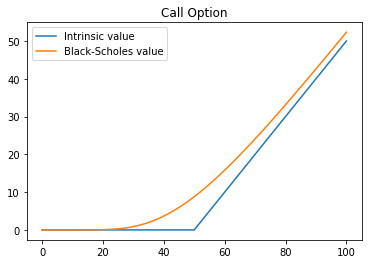

In [4]:
underlying = np.linspace(0,100,101)
intrinsic = np.maximum(underlying-strikePrice, 0)
bs = [callBS(x, strikePrice, timetoMaturity, sigma, r) for x in underlying]

plt.plot(underlying, intrinsic, label="Intrinsic value")
plt.plot(underlying, bs, label="Black-Scholes value")
plt.legend()
plt.title("Call Option")
plt.show()

C:\Users\kerry\AppData\Local\Temp\ipykernel_2612\3089416366.py:14: RuntimeWarning: divide by zero encountered in log
  d1 = np.log(underlyingPrice/strikePrice) + (r-q+0.5*sigma**2)*timetoMaturity


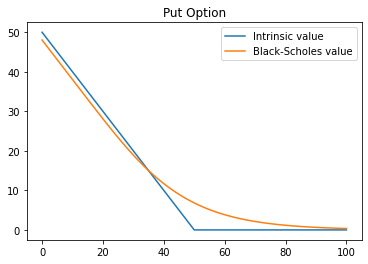

In [5]:
underlying = np.linspace(0,100,101)
intrinsic = np.maximum(strikePrice-underlying, 0)
bs = [putBS(x, strikePrice, timetoMaturity, sigma, r) for x in underlying]

plt.plot(underlying, intrinsic, label="Intrinsic value")
plt.plot(underlying, bs, label="Black-Scholes value")
plt.legend()
plt.title("Put Option")
plt.show()